### Climate Analysis and Exploration

* Performed basic climate analysis and data exploration on weather station tables. Used SQLAlchemy ORM queries, Pandas, and Matplotlib.

* Created a Jupyter Notebook file called climate_analysis.ipynb and used it to complete climate analysis and data exporation.

* Used SQLAlchemy create_engine to connect to your sqlite database.

* Used SQLAlchemy automap_base() to reflect your tables into classes and save a reference to those classes called Station and Measurement.

In [12]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Create database connection
engine = create_engine('sqlite:///hawaii.sqlite')

In [14]:
# Declare a base using 'automap_base()'
Base = automap_base()
#Use the base class to reflect the database tables
Base.prepare(engine, reflect=True)


In [15]:
Base.classes.keys()

['measurements', 'stations']

In [16]:
!rm hawaii.sb
!rm hawaii.sqlite

'rm' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.


In [17]:
meas=Base.classes.measurements
station=Base.classes.stations

In [18]:
#Create a session
session=Session(engine)

In [21]:
#Display the row's columns and data in dictionary format
first_row=session.query(meas).first()
first_row.__dict__

AttributeError: 'NoneType' object has no attribute '__dict__'

## Precipitation Analysis
* Designed a query to retrieve the last 12 months of precipitation data.

* Selected only the date and prcp values.

* Loaded the query results into a Pandas DataFrame and set the index to the date column.

* Plotted the results using the DataFrame plot method.

In [14]:
# Plotted the precipitation for each day in the last year.
# Averaged the measurements to get one measurement value each day.
# Max date is '2017-08-23', will take 12 months of data from this date.
d={}
dates=[]
prcps=[]
l_tobs=[]
# datetime.strptime(meas.date, '%Y-%m-%d').date()> datetime.date(2017,4,5)

last_12_months = session.query(meas.date, meas.prcp,meas.tobs).\
    filter(meas.date>'2016-08-22')
for date, prcp, tobs in last_12_months.all():
#     print(key, value)
    dates.append(date)
    prcps.append(prcp)
    l_tobs.append(tobs)

    
d["Dates"]=dates
d["prcps"]=prcps
d["tobs"]=tobs
df=pd.DataFrame(d)
df.set_index("Dates")
df.head()


AttributeError: type object 'measurements' has no attribute 'prcp'

,prcps,tobs
Dates,,
2016-08-23,0.451667,76
2016-08-24,1.555000,76
2016-08-25,0.077143,76
2016-08-26,0.016667,76
2016-08-27,0.064000,76


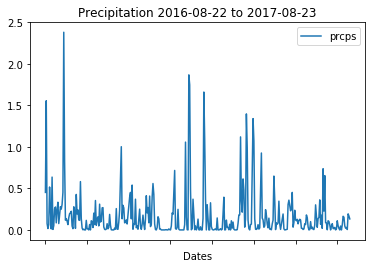

In [9]:
# Organize dataframe by date

df_grp1=df.groupby('Dates').mean()
display(df_grp1.head())

df_grp1.plot(y="prcps",title="Precipitation 2016-08-22 to 2017-08-23")


### Station Analysis

* Designed a query to calculate the total number of stations.

* Designed a query to find the most active stations.

  * Listed the stations and observation counts in descending order

  * Arrived at highest number of observations?

* Designed a query to retrieve the last 12 months of temperature observation data (tobs).

  * Filtered by the station with the highest number of observations.

  * Plotted the results as a histogram with `bins=12`.


In [10]:
# Tot number of stations are 9
tot_station= session.query(station).count()
for station in session.query(station.station):
    print(station)

('USC00519397',)
('USC00513117',)
('USC00514830',)
('USC00517948',)
('USC00518838',)
('USC00519523',)
('USC00519281',)
('USC00511918',)
('USC00516128',)


In [11]:
#The most activate stations
# This station has the highest number:USC00519281

m_station=[]
m_prcp=[]
meas_station = session.query(meas.station, meas.prcp)
for station, prcps in meas_station:
    m_station.append(station)
    m_prcp.append(prcps)
    

dict={}
dict["Station"]=m_station
dict["prcps"]=m_prcp
df1=pd.DataFrame(dict)
df1_cnt=df1.groupby("Station").count()
df1_cnt.sort_values(by="prcps",ascending=False)

,prcps
Station,
USC00519281,2772
USC00513117,2696
USC00519397,2685
USC00519523,2572
USC00516128,2484
USC00514830,1937
USC00511918,1932
USC00517948,683
USC00518838,342


In [17]:
## Query to retrieve the last 12 months of temperature observed,
#   filtered by the station with the highest number of observations

d={}
dates=[]
prcps=[]
l_tobs=[]

last_12_months = session.query(meas.date, meas.tobs).\
    filter(meas.date>'2016-08-22').filter(meas.station=='USC00519281')
for date, tobs in last_12_months:
    dates.append(date)
#     prcps.append(prcp)
    l_tobs.append(tobs)

    
d["Dates"]=dates
# d["prcps"]=prcps
d["tobs"]=l_tobs
df2=pd.DataFrame(d)
df2.set_index("Dates")
df2.head(10)

,Dates,tobs
0,2016-08-23,77
1,2016-08-24,77
2,2016-08-25,80
3,2016-08-26,80
4,2016-08-27,75
5,2016-08-28,73
6,2016-08-29,78
7,2016-08-30,77
8,2016-08-31,78
9,2016-09-01,80


In [27]:
# plot the results as a histogram with bins of 12
# tobs max = 79, tobs min=59
bins =[58,60,62,64,66,68,70,72,74,76,78,80,82]
(79-59)/12 #2
bin_names = ['58->60', '60->62', '62->64', '64->66','66->68','68->70','70->72',\
            '72->74','74->76','76->78','78->80','80->82']

In [35]:
# Cut postTestScore and place the scores into bins
df2["Temperature Groups"] = pd.cut(df2["tobs"], bins, labels=bin_names)
# Creating a group based off of the bins
df2_grp1=df2.groupby("Temperature Groups").count()
df2_grp1["tobs"]

Temperature Groups
58->60     5
60->62     7
62->64     7
64->66    12
66->68    27
68->70    41
70->72    40
72->74    57
74->76    66
76->78    53
78->80    29
80->82     7
Name: tobs, dtype: int64

Text(0,0.5,'Frequency')

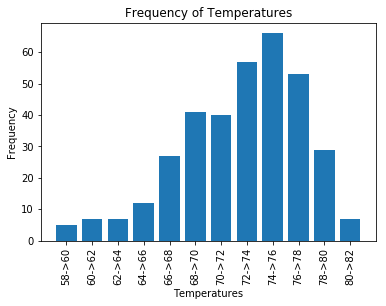

In [39]:
# Plot result into an histogram
x_axis=np.arange(12)
tick_locations =[value for value in x_axis]
plt.xticks(tick_locations,bin_names, rotation=90)
plt.bar(x_axis, df2_grp1["tobs"])
plt.title("Frequency of Temperatures")
plt.xlabel("Temperatures")
plt.ylabel("Frequency")

### Temperature Analysis

* Arrived at a function called `calc_temps` that will accept a start date and end date in the format `%Y-%m-%d` and return the minimum, average, and maximum temperatures for that range of dates.

* Used the `calc_temps` function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

* Plotted the min, avg, and max temperature from your previous query as a bar chart.

  * Used the average temperature as the bar height.

  * Used the peak-to-peak (tmax-tmin) value as the y error bar (yerr).



In [41]:
def calc_temps(start_date, end_date):
    #input date format: `%Y-%m-%d`
    d_return={}
    #Assuming the temperature for all the stations are being used.
    d={}
    l_dates=[]
    l_tobs=[]

    last_12_months = session.query(meas.date, meas.tobs).\
        filter(meas.date>=start_date).filter(meas.date<=end_date)
    for date, tobs in last_12_months:
        l_dates.append(date)
        l_tobs.append(tobs)


    d["Dates"]=l_dates
    d["tobs"]=l_tobs
    df3=pd.DataFrame(d)
    d_return["max"]=df3["tobs"].max()
    d_return["min"]=df3["tobs"].min()
    d_return["avg"]=df3["tobs"].mean().round(2)
    return d_return

start_date='2016-04-03'
end_date='2016-04-13'

dict=calc_temps(start_date,end_date)
print(dict)


{'max': 78, 'min': 65, 'avg': 73.14}


Text(0,0.5,'Temperature')

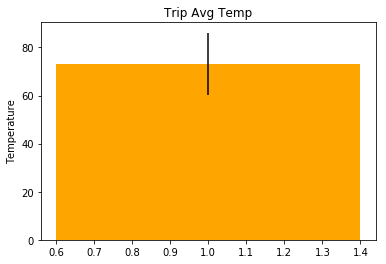

In [50]:
#Graph the results 
plt.bar(1,dict["avg"],color="orange",yerr=dict["max"]-dict["min"])
# Avg Temperature on your trip \n2016-04-13 to 2016-04-13
plt.title("Trip Avg Temp")
plt.ylabel("Temperature")